In [10]:
import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, clear_output

# Day 6 Chronal Coordinates

We have a list of coordinates, and have to figure out which one is safe

In [157]:
utils.get_input(6).splitlines()[:5]

['78, 335', '74, 309', '277, 44', '178, 286', '239, 252']

In [2]:
test_inp = """1, 1
1, 6
8, 3
3, 4
5, 5
8, 9""".splitlines()
test_inp[0].split(", ")

['1', '1']

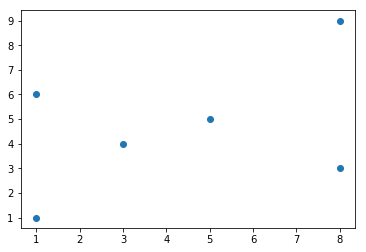

In [38]:
def process_input(inp=test_inp):
    """takes in input string and returns x and y coordinate lists"""
    xx, yy = [], []
    
    for point in test_inp:
        x, y = point.split(", ")
        xx.append(int(x))
        yy.append(int(y))
        
    pairs = list(zip(xx, yy))
        
    return xx, yy, pairs

xx, yy, pairs = process_input()
plt.scatter(xx, yy);

Now i'm going to make a empty grid and place every point on it:

In [82]:
def make_grid(xx=xx, yy=yy):
    grid = np.zeros(shape=(max(yy)+2, max(xx)+2), dtype="int")
    for i, (x, y) in enumerate(zip(xx, yy)):
        grid[y,x] = i + 1
    
    return grid

grid = make_grid()

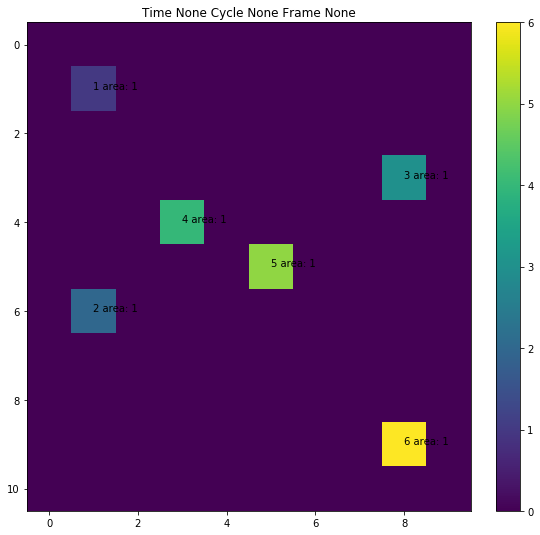

In [83]:
def plot(grid=grid, pairs=pairs, time=None, cycle=None, frame=None):
    clear_output(wait=True)
    
    fig, ax = plt.subplots(figsize=(9,9))
    ax.set_title(f"Time {time} Cycle {cycle} Frame {frame}")
    pos = ax.imshow(grid, origin="upper")
    fig.colorbar(pos, ax=ax, fraction=0.066)
    
    for i, pair in enumerate(pairs):
        area = (grid == i+1).sum()
        ax.annotate(f"{i+1} area: {area}", pair)

    
    plt.show()

plot()

Now I want to fill in the grid so each zero num is labelled the number of the closest pair, so first up a func to return the manhatten distance b/w two coordinates:

In [84]:
def manhatten_dist(p1, p2):
    """takes in two points, returns the mahatten distance"""
    return abs(p2[0] - p1[0]) + abs(p2[1] - p1[1])

assert manhatten_dist((1,1), (1,1)) == 0
assert manhatten_dist((1,1), (2,1)) == 1
assert manhatten_dist((1,1), (3,2)) == 3

In [85]:
def find_closest_pair(xy, pairs=pairs):
    """
    takes in a coordinate, a list of pairs, and returns the number
    of the closest pair"""
    
    distances = [manhatten_dist(xy, p) for p in pairs]
    m = np.argmin(distances)
    if distances.count(distances[m]) == 1:
        return m + 1
    else:
        return 0
    
find_closest_pair((0,0)), find_closest_pair((9,0))

(1, 3)

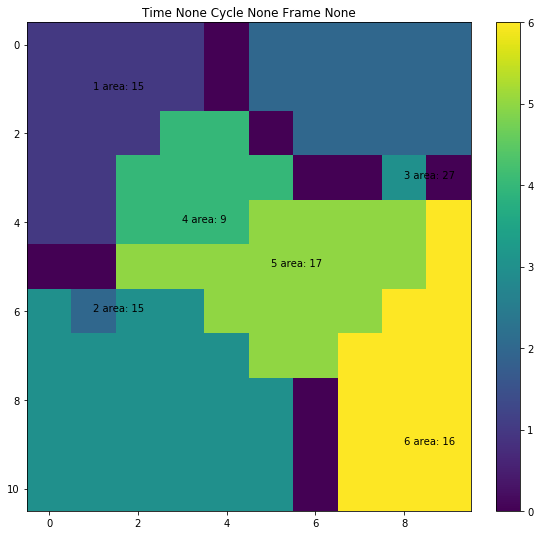

In [86]:
for xy in np.ndindex(grid.shape):
    if grid[xy] == 0:
        grid[xy] = find_closest_pair(xy)
        
plot(grid)

In [96]:
grid

array([[1, 1, 1, 1, 0, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 0, 2, 2, 2, 2, 2],
       [1, 1, 1, 4, 4, 0, 2, 2, 2, 2],
       [1, 1, 4, 4, 4, 4, 0, 0, 3, 0],
       [1, 1, 4, 4, 4, 5, 5, 5, 5, 6],
       [0, 0, 5, 5, 5, 5, 5, 5, 5, 6],
       [3, 2, 3, 3, 5, 5, 5, 5, 6, 6],
       [3, 3, 3, 3, 3, 5, 5, 6, 6, 6],
       [3, 3, 3, 3, 3, 3, 0, 6, 6, 6],
       [3, 3, 3, 3, 3, 3, 0, 6, 6, 6],
       [3, 3, 3, 3, 3, 3, 0, 6, 6, 6]])

In [121]:
edges = set()
edges = edges.union(grid[:,0]).union(grid[:,-1])
edges = edges.union(grid[0]).union(grid[-1])
edges

{0, 1, 2, 3, 6}

In [123]:
areas = {}

for pos in set(np.unique(grid)) - edges:
    area = (grid == pos).sum()
    areas[pos] = area
    
areas

{4: 9, 5: 17}